In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
CNN = Sequential()

CNN.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1), activation="relu"))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Flatten())

CNN.add(Dense(32,activation="relu"))
CNN.add(Dense(1,activation="softmax"))

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


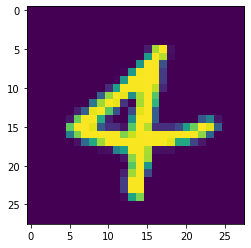

Label:  4


In [5]:
plt.imshow(x_train[150])
plt.show()

print("Label: ", y_train[150])

In [6]:
for row in x_train[150]:
    for i in row:
        print("%3s" %i, end="")
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19221254 11  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0139253227  8  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0135254253 63  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  4138252254253 44  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  3138253253254253 44  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 31144253253253254230 29  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 80216253247127224254187  0  0  0  0  

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train.dtype

dtype('uint8')

In [9]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train.dtype

dtype('float32')

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_train[0]

5

In [13]:
from keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2, random_state=0)

In [17]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

result = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5, batch_size=128, verbose=0)

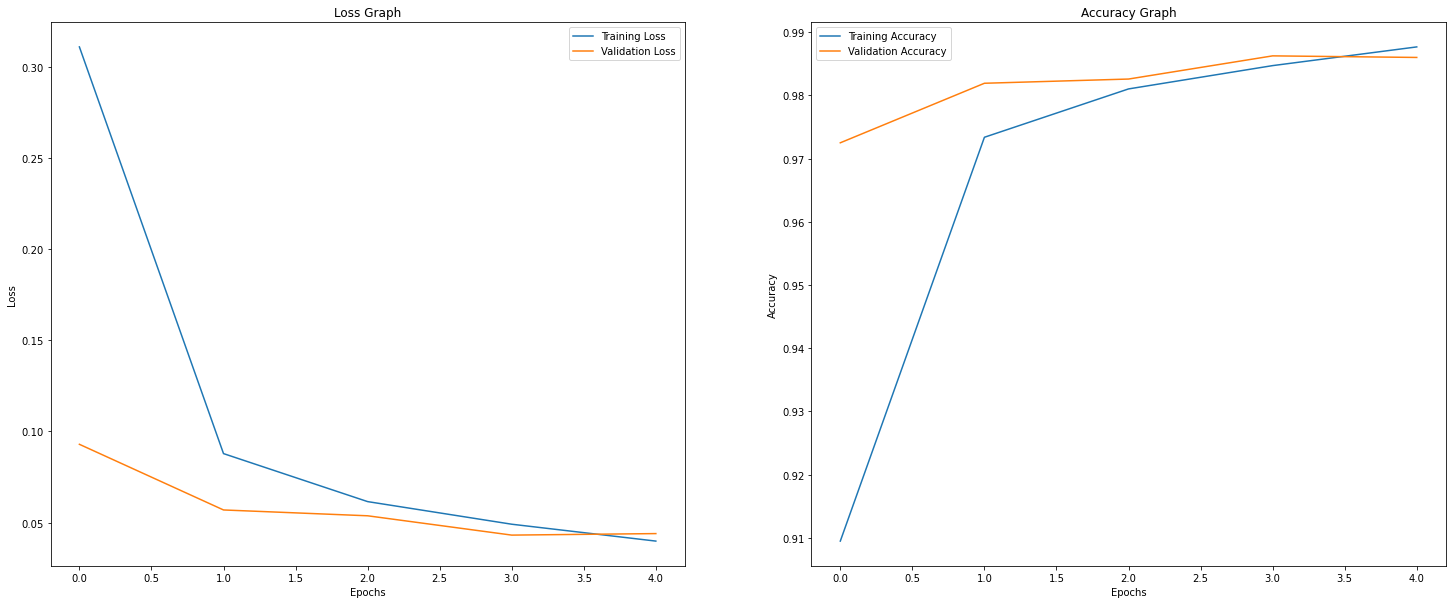

In [18]:
fig, ax = plt.subplots(1,2, figsize=(25,10))

ax[0].plot(result.history["loss"],label="Training Loss")
ax[0].plot(result.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"],label="Training Accuracy")
ax[1].plot(result.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show();

In [19]:
def modelkur(filtre=32, kernel=3, conv_layer=3,dense_layer=2,units=32,learning_rate=0.01,dropout_rate=0.2):
    
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    for i in range(conv_layer):
        model.add(Conv2D(filters=filtre,kernel_size=(kernel,kernel),activation="relu", padding="same"))
        model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

    model.add(Flatten())
    model.add(Dense(32,activation="relu"))

    for i in range(dense_layer):
        model.add(Dense(units,activation="relu"))
        model.add(Dropout(dropout_rate))
        
        
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=Adam(learning_rate),loss="categorical_crossentropy",metrics=["accuracy"])

    return model


parametreler = {"filtre":       [32,64],
                "kernel":       [3,5],
                "conv_layer":   [3,4],
                "dense_layer":  [2,3],
                "units":        [32,64],
                "learning_rate":[0.001,0.01],
                "dropout_rate": [0.0,0.02],
                "epochs":       [20,30]}

clf = KerasClassifier(build_fn=modelkur,verbose=0)
grid = GridSearchCV(estimator=clf,param_grid=parametreler,cv=3)
model = grid.fit(x_train,y_train)
bestparam = model.best_params_

bestmodel = modelkur(filtre=bestparam["filtre"], kernel= bestparam["kernel"],
                     conv_layer=bestparam["conv_layer"], dense_layer=bestparam["dense_layer"],
                     units=bestparam["units"],learning_rate=bestparam["learning_rate"],
                     dropout_rate=bestparam["dropout_rate"])

bestmodelx = bestmodel.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=bestparam["epochs"],verbose=0)

C:\Users\Burak\AppData\Local\Temp\ipykernel_5348\3606267085.py:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=modelkur,verbose=0)
Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000002A01F7CB310>
Traceback (most recent call last):
  File "C:\Anaconda3\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
fig, ax = plt.subplots(1,2, figsize=(25,10))

ax[0].plot(bestmodelx.history["loss"],label="Training Loss")
ax[0].plot(bestmodelx.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(bestmodelx.history["accuracy"],label="Training Accuracy")
ax[1].plot(bestmodelx.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show();

In [ ]:
bestmodel.save("modelim.h5")

In [ ]:
from keras.models import load_model


model = load_model("modelim.h5")


fig, ax = plt.subplots(1,2, figsize=(25,10))

ax[0].plot(model.history["loss"],label="Training Loss")
ax[0].plot(model.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(model.history["accuracy"],label="Training Accuracy")
ax[1].plot(model.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show();

In [ ]:
tahmin= model.predict(x_test)

i = 40

plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title(f"Gerçek etiket: {y_test[i]} \n Tahmin Etiket: {np.argmax(tahmin[i])}")
plt.show();